# Projet Maths 3

# Questions théoriques

> **1. Quel théorème du cours nous autorise-t-il à estimer l’espérance conditionnelle par la moyenne empirique de simulations conditionnelles.**

Rappelons le théorême de la limite centrale : 

Si les $Z_n$ sont des variables aléatoires réelles, indépendantes et de même loi, de carré intégrable, d'espérance $m$ et de variance $\sigma^2 >0$, alors les variables $\frac{S_n -nm}{\sigma \sqrt{n}}$ convergent en loi vers une variable aléatoire de loi $\mathcal{N}(0,1)$.

En d'autres termes, $\sqrt{n}(M_n - m)$ converge vers une variable normale de loi $\mathcal{N}(0,\sigma^2)$

On en déduit que $n^\alpha (\frac{S_n}{n} - m)$ converge vers 0 (resp. $+\infty$) en probabilité lorsque $\alpha < 1/2$ (resp. $\alpha > 1/2$)

En particulier pour $\alpha = 0$ : 
$$\frac{S_n}{n} \to^\mathbb{P} m$$

Soit $(\Omega,\mathcal{A},\mathbb{P}_Z)$ l'espace probabilisé. Posons $Z_n$ le resultat du  n-ème tirage avec remise d'un élément de cet espace. Les $(Z_n)_\mathbb{N}$ vérifient les ocnditions d'application du **théorême de la limite centrale**. 



D'où en considérant le vecteur aléatoire conditionnel $Y|X=x$. En notant Y les valeurs prises aux points de discretisation sans observation et X les valeurs prises par les composantes aux sites d'observation. On a alors sans perte de généralité $Z = (X,Y)$ par permutations.

La moyenne des simulations conditionelles converge vers l'espérance conditionelle. **Il est donc approprié de l'approcher de cette façon.**

> **2. Rappeler la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation.**

Le vecteur aléatoire des composantes de $Z$ correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation est noté $Z'$

En notant $Y$ les valeurs prises aux points de discretisation sans observation et $X$ les valeurs prises par les composantes aux sites d'observation. On a alors sans perte de généralité $Z = (X,Y)$ par permutations.

$Z'= Z|X=x = Y|X=x$ admet une densité $f_{Y|X=x}$
telle que 
$$f_{Y|X=x} =\frac{1}{(2\pi)^{k/2}\sqrt{det(CS_Y)}}exp(-\frac{1}{2}(y-\Psi(x))^\perp CS_Y^{-1}(y-\Psi (x)))$$

avec : 
$$
CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y} 
$$

où on a  :

$$
E(Y|X=x) = \Psi(z)= m_Y + C_{Y,Z}C_Z^{-1}(z-m_Z)
$$


> **3. Si Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1, quelle est la loi du vecteur Z = m + RY où R est une matrice p × p et m est un vecteur de taille p ?**

Si Y est un vecteur de composantes gaussiennes indépendantes, toutes d'esperance nulle et de variance 1,  alors on peut caractériser cette variable aléatoire par sa fonction caractéristiques $\Phi_Y(u) =e^{i<u|m>-\frac{1}{2} <u|I_n u>}$

Or d'après le cours de Probabilté $III$ $\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$

Ce qui dans notre cas nous donne : 

$$\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$$

Donc Z suit la loi qui a pour fonction caractéristique : 
$$
\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>-\frac{1}{2} <R^\perp u| R^\perp u>}
$$


> **4. En déduire un algorithme de simulation conditionnelle.**

On en déduit donc qu'en utilisant une matrice R bien choisie on peut arriver simuler un vecteur gaussien conditionnel

En effet si on choisit la transformée de Cholesky de la matrice de covariance conditionelle $CS_Y$, que l'on notera $R$ :
En posant $Z'  = m +RY$ où $Y = (Y1, . . . , Yp)$ est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1

$\Phi_{Z'}(u) = e^{i<u|m> -\frac{1}{2}<R^\perp u|R^\perp u> }
 =  e^{i< u|m> -\frac{1}{2} <u|CS_Yu>}$ ( par symétrie de R ) 
 
$$
\Phi_{Z'}(u) = e^{i<u| m>-\frac{1}{2} <u|CS_Yu>}
$$

Donc $Z'$ est une variable aléatoire à densité, $Z'$ est un un vecteur gaussien

De plus Z'est de même loi que la variable aléatoire gaussienne $Y|X=x$ par identification des fonctions caractéristiques.

On peut donc proposer un algorithme de simulation : 

### Algorithme de simulation
--------

- Fixer les vealeurs aux points d'observations 
- Calculer la matrice de covariance conditionelle
- Calculer la transformée de Cholesky
- Simuler Y un vecteur gaussien centré réduit de composantes indépendantes
- Simuler Z par transformation affine
- Recommencer

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt


In [2]:
#Discrétisation
A=0
B=500
N=101

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
print(Delta)
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))



5.0


In [68]:
# 1. Covariance entre deux points 
def C(Mat_dist, a, sigma2):
    Mat_C=np.ones((len(Mat_dist), len(Mat_dist)))
    for i in range(len(Mat_dist)):
        for j in range(len(Mat_dist)):
            Mat_C[i][j]=sigma2*np.exp(-abs(Mat_dist[i][j])/a)
    return Mat_C

In [69]:
# 2. Construction matrice de distance
discretization
def mat_distance(discretization):
    M=np.ones((len(discretization),len(discretization)))
    for i in range(len(discretization)):
        for j in range(len(discretization)):
            M[i,j] = abs(discretization[i] - discretization[j])
    return M 

Mat_dist= mat_distance(discretization)


In [70]:
# 3. Calcul de la matrice de covariance
covar = C(mat_distance(discretization), a, sigma2)


In [71]:
# 4. Extraction des matrices de covariances

## entre observations 
rows = np.array(observation_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_obs = covar[rows[:, np.newaxis], columns]
## entre inconnues
rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(unknown_indexes, dtype=np.intp)
covar_unk_unk = covar[rows[:, np.newaxis], columns]
## entre inconnues-observations
rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_unk= covar[rows[:, np.newaxis], columns]

In [72]:
# Fonction Utile
def builder(depth,observation_indexes, Z , N):
    prof = []
    depth = depth
    Z = Z

    for i in range (N):
        if i in observation_indexes :
            last, depth = depth[0], depth[1:]
            prof.append(last)
        else : 
            last, Z = Z[0], Z[1:]
            prof.append(last)
    return prof

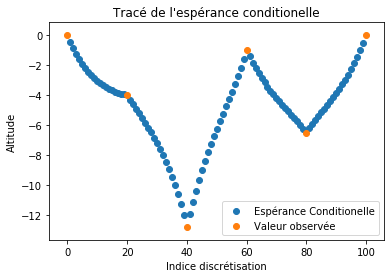

In [73]:
# 5. Calcul de l'espérance conditionelle et représentation
esp_cond = np.array([mu for i in range(len(unknown_indexes))]) +  covar_obs_unk @ np.linalg.inv(covar_obs_obs)@(np.array(depth) - [mu for i in range( len( observation_indexes)) ])
plt.scatter(unknown_indexes,esp_cond, label = "Espérance Conditionelle")
plt.scatter(observation_indexes,depth, label = 'Valeur observée')
plt.xlabel('Indice discrétisation')
plt.ylabel("Altitude")
plt.title("Tracé de l'espérance conditionelle")
plt.legend()


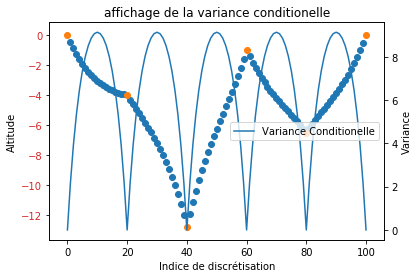

In [75]:
# 6. Calcul matrice de covariance conditionnelle / Affichage variance Conditionnelle
cov_cond = covar_unk_unk - covar_obs_unk@np.linalg.inv(covar_obs_obs) @ covar_obs_unk.transpose()
var_cond=np.array([cov_cond[i,i] for i in range (len(cov_cond))])



plt.scatter(unknown_indexes,esp_cond)
plt.scatter(observation_indexes,depth)
plt.tick_params(axis='y', labelcolor='tab:red')
plt.ylabel('Altitude')
plt.xlabel('Indice de discrétisation')
plt.twinx()
plt.plot(builder([0,0,0,0,0,0],observation_indexes,var_cond,N),label = 'Variance Conditionelle')
plt.ylabel("Variance")
plt.title('affichage de la variance conditionelle')
plt.legend()




**On remarque que la variance conditionelle est très faible au voisinage des points d'observation. Mais au contraire atteint un maximum au milieu des deux observations. La dispersion des données est bien plus importante quand la distance à un point d'observation augmente ( dans le cas où tous les points inconnues sont indépendants).** 

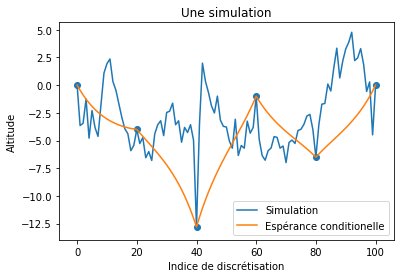

In [81]:
# 7. Simulation conditionelle
L = np.linalg.cholesky(cov_cond) # L est ainsi traingulaire inférieure 


def simul( L):
    f= lambda u,v : np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    g= lambda u,v : np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    Y = np.random.normal(0,1,len(unknown_indexes))
    Z = np.array([mu for i in range(len( unknown_indexes))])+ L@ Y
    return Z

Z = simul(L)

plt.plot(builder(depth,observation_indexes,Z,N),label = "Simulation")
plt.plot(builder(depth,observation_indexes,esp_cond,N), label = 'Espérance conditionelle')
plt.scatter(observation_indexes,depth)
plt.title('Une simulation')
plt.xlabel("Indice de discrétisation")
plt.ylabel("Altitude")
plt.legend()


In [82]:
# 8. Fonction qui calcule la longueur du cable. 

def longueur ( prof, delta):
    S = 0
    for i in range(1,len(prof)):
        S+= np.sqrt(delta**2 +(prof[i]-prof[i-1])**2)
    return S

In [83]:
# 9. 100 simulations, espérance conditionnelle de la longueur et longueur de l'esperance conditionnelle

def longueur_simulée(Nb):
    E,V=[],[]
    for i in range(Nb):
            Z=simul(L)
            E.append(longueur(builder(depth,observation_indexes,Z,N),Delta))
            V.append(longueur(builder(depth,observation_indexes,Z,N),Delta)**2)

    return E,V  #On a calculé E(X) et E(X^2) afin de calculer la variance. 

esperance_cond_delalong= np.round(np.average(longueur_simulée(100)[0]),3)
variance_cond=np.round(np.average(longueur_simulée(100)[1])**2-np.average(longueur_simulée(100)[0])**2,3)
longueur_delesperance_cond=np.round(longueur(builder(depth,observation_indexes,esp_cond,N),Delta),3)


# Affichage
print ('\n')
print ('\n')
print(f"La longueur de l'espérance conditionnelle est {longueur_delesperance_cond} m  ")
print ('\n')
print("==============================")
print ('\n')
print(f"L'espérance conditionelle de la longueur est {esperance_cond_delalong} m  pour 100 simulations")
print ('\n')
print ('\n')





La longueur de l'espérance conditionnelle est 501.647 m  




L'espérance conditionelle de la longueur est 537.106 m  pour 100 simulations






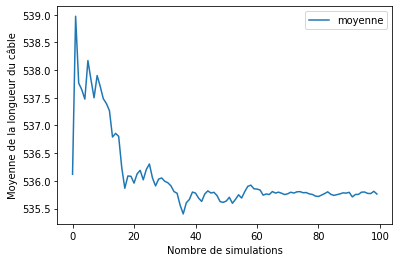

In [110]:
# 10. Suites Mn des moyennes de longueur de cables

def dessin_Mn(simuls, ax=None): 
    Nb = len(simuls)
    Y=[]
    if ax == None:
        ax =plt.gca()
    for i in range(1,Nb+1):
        Y.append(np.average(simuls[:i]))
    ax.plot(Y, label = "moyenne")
    ax.set_xlabel("Nombre de simulations")
    ax.set_ylabel("Moyenne de la longueur du câble")
    ax.legend()

#def dessin_Mn(Nb):     #c'est une méthode si on acccepte le fait de resimuler à chaque fois. 
#    X=[i for i in range(1,Nb+1)]
#    Y=[]
#    for i in range(Nb):
#        Y.append(longueur_simulée(i)[2])
#    plt.plot(X,Y)
#    plt.show()
simuls=np.array(longueur_simulée(100)[0])
dessin_Mn(simuls)

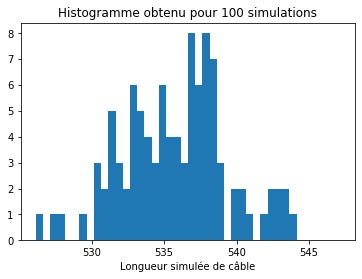

In [85]:
# 11. Histogramme des longueurs de câbles générés. 

simuls =np.array(longueur_simulée(100)[0])


def histogramme(simuls, ax=None):
    Nb = len(simuls)  
    if ax==None:
        ax = plt.gca()
    n, bins, patches = ax.hist(simuls, bins = np.arange(simuls.min(),simuls.max(),0.5), )
    ax.set_xlabel("Longueur simulée de câble")
    ax.set_title(f"Histogramme obtenu pour {Nb} simulations")
    
histogramme(simuls)

In [97]:
# 12 intervalle de confiance
def trace_info (simuls, ax= None):
    mean = simuls.mean()
    std = simuls.std()
    conf = 1.960*std/np.sqrt(len(simuls))
    ax.axvline(x=mean, linewidth=1, color='r', label = "moyenne des longueurs")
    ax.axvline(x=mean +std, linewidth=1, color='g', label = " écart type")
    ax.axvline(x=mean - std, linewidth=1, color='g', label = 'intervalle de confiance')
    ax.axvline(x=mean - conf, linewidth=1, color='y')
    ax.axvline(x=mean + conf, linewidth=1, color='y')
    ax.legend()
    print("============================")
    print('\n')
    print("Méthode par calcul empirique de l'écart type")
    print('\n')
    print(f"pour {len(simuls)} simulations l'intevalle de confiance à 95% est de {conf*2} m  ")


#### Calcul de l'intervalle de confiance avec calcul empirique de l'écart type
---------

Avec l'intervalle de confiance défini comme :
$$
IC = [\bar{X} - 1,96. \frac{\sigma}{\sqrt{n}},\bar{X} + 1,96. \frac{\sigma}{\sqrt{n}}]
$$

Où $\bar{X}$ est la moyenne empirique et $\sigma$ l'écart type de la population




In [98]:
# 13. fonction de répartition expérimentale

simuls =np.array(longueur_simulée(100)[0])
def F_repart(level, simuls):
    S = 0
    for i in simuls:
        if i >level :
            S+=1
    print('\n')
    print(f" Pour {len(simuls)} simulations, la probabilité d'être au dessus de 525 m est de {1 - S/len(simuls)}")
    print('\n')
F_repart(525,simuls)



 Pour 100 simulations, la probabilité d'être au dessus de 525 m est de 0.0




In [104]:
# 14. reprendre avec 1000, 10000, 100000
simuls =np.array(longueur_simulée(100000)[0])
L1= simuls[:1000]
L2 = simuls[:10000]
L3 = simuls[:100000]
# L2= longueur_simulée(10000)[0]
# L3= longueur_simulée(100000)[0]
list=[L1, L2, L3]



Méthode par calcul empirique de l'écart type


pour 1000 simulations l'intevalle de confiance à 95% est de 0.46838918299416826 m  


 Pour 1000 simulations, la probabilité d'être au dessus de 525 m est de 0.0




Méthode par calcul empirique de l'écart type


pour 10000 simulations l'intevalle de confiance à 95% est de 0.15203576216841078 m  


 Pour 10000 simulations, la probabilité d'être au dessus de 525 m est de 0.0006000000000000449




Méthode par calcul empirique de l'écart type


pour 100000 simulations l'intevalle de confiance à 95% est de 0.04767911833167836 m  


 Pour 100000 simulations, la probabilité d'être au dessus de 525 m est de 0.0007700000000000484




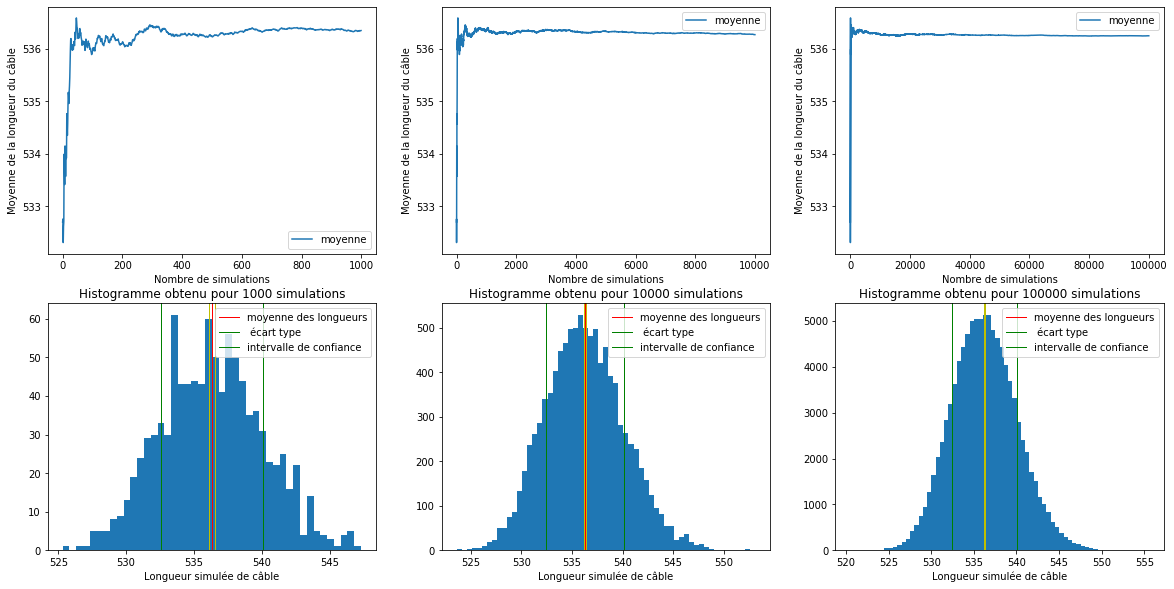

In [105]:
fig, axess = plt.subplots(2, 3, figsize = (20,10))

for i in range(3) :
    dessin_Mn(list[i], axess[0, i])
    histogramme(list[i], axess[1, i])
    trace_info(list[i], axess[1,i])
    F_repart(525,list[i])

On remarque :
- Que les longueurs se répartissent selon une loi Gaussienne
- Que la mesure de l'écart type est stable pour 100, 1000, ou 100000 mesures et que donc la mesure de l'intervalle de confiance peut être réalisée avec une valeur approchée de l'écart type
- L'intervalle de confiance se réduit grandement avec le nombre de simulations, ne se rapprochant plsu que de l'ordre du centimetre. 
- On remarque que la fonction de répartition pour des valeurs extrêmes comme 525 est très peu fiable à un petit nombre de simulations. Ces indicateurs ne prennent tout leur sens qu'à partir d'un grand nombre de simulations.
 